In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import os
import openpyxl as opxl

from itertools import islice
import datetime

In [2]:
# Cleans the main df
def clean_synergy_data(names, df, lista_rows):
    df_cons = pd.DataFrame(columns=df.columns)
    for i, value in enumerate(lista_rows):
        if i == 0:
            df2 = pd.DataFrame(df.iloc[0:lista_rows[i][1] - 3])
        else:
            df2 = pd.DataFrame(df.iloc[lista_rows[i-1][1] + 1:lista_rows[i][1] - 3])
        df2['name'] = names[i]
        fix_synergy_time(df2)
        df_cons = df_cons.append(df2, ignore_index=True, sort=False)
    return df_cons

In [3]:
# Changes time's format from datetime to fraction
def fix_synergy_time(df):
    t = np.array([])
    for i, value in enumerate(df['Time']):
        if i > 0:
            if df['Time'].iloc[i].hour < df['Time'].iloc[i-1].hour:
                t = np.append(t, [24 + value.hour + value.minute/60 + value.second/3600])
            else:
                t = np.append(t, [value.hour + value.minute/60 + value.second/3600])
        else:
            t = np.append(t, [value.hour + value.minute/60 + value.second/3600])
    df['Time'] = t

In [4]:
def lista_rows(ws, medidas):
    lista_rows = [(celda.value, celda.row, opxl.utils.column_index_from_string(celda.column)) 
                  for celda in ws['A'] 
                  if celda.value in medidas]
    return lista_rows

In [5]:
def load_synergy_data(medidas, ws):
    rows = lista_rows(ws, medidas)
    ws.delete_rows(0, rows[0][1] + 1)
    rows = lista_rows(ws, medidas)

    data = ws.values
    cols = next(data)[1:]
    data = list(data)
    idx = [r[0] for r in data]
    data = (islice(r, 1, None) for r in data)
    df = pd.DataFrame(data, columns=cols)
    df = df.drop('T° OD600:600', axis=1)

    names = ['OD', 'RFP', 'YFP', 'CFP']
    df_cons = clean_synergy_data(names, df, rows)
    return df_cons

### Cargo metadata

In [6]:
# Probar cuando trae solamente un elemento en el arreglo, con strain solamente por ejemplo
data_str = open('MetaTest.json').read()
data = json.loads(data_str)

In [7]:
# Candidato 1

df_json = pd.read_json(data)
columns = [x+str(y) for x in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'] for y in range(1,13)]
df_json.columns = columns
df_json.index = ['Strain', 'Media', 'DNA']
df_json

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
Strain,"{'name': 'data', 'value': 'None'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}",...,"{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}"
Media,"{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}",...,"{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}"
DNA,"{'name': 'data', 'value': 'None'}","{'name': 'data', 'value': 'None'}","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'pLux76:RFP/std:YFP/...","{'name': 'data', 'value': 'pLux76:RFP/std:YFP/...","{'name': 'data', 'value': 'pLux76:RFP/std:YFP/...",...,"{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF..."


In [8]:
json_df = df_json.to_json()

In [180]:
# Candidato 2

# Este funciona traspuesto. Candidato 1 mejor porque está en el mismo orden que el lector
"""
index = [x+str(y) for y in range(1,13) for x in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
df_json = pd.read_json(data, orient='index')
df_json.columns = ['Strain', 'Media', 'DNA']
df_json.index = index
df_json
"""

"\nindex = [x+str(y) for y in range(1,13) for x in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]\ndf_json = pd.read_json(data, orient='index')\ndf_json.columns = ['Strain', 'Media', 'DNA']\ndf_json.index = index\ndf_json\n"

In [9]:
###########
# Esta info debe ser recibida al inicio de la carga de datos
file_name = 'ExpTest.xlsx'
experiment_name = os.path.basename(file_name).split('/')[-1].split('.')[0]
medidas = ['OD600:600', 'RFP-YFP:585/10,620/15', 'RFP-YFP:500/27,540/25', 'CFP:420/50,485/20', 'Results']
wb = opxl.load_workbook(filename = file_name, data_only=True)
ws = wb['Data']
machine_name = ws['B'][8].value + str(ws['B'][9].value)

name_map = {'OD600:600':'OD', 'RFP-YFP:500/27,540/25':'YFP', 'CFP:420/50,485/20':'CFP',
'RFP-YFP:585/10,620/15':'RFP'}

### Cargo data

In [10]:
df_cons = load_synergy_data(medidas, ws)
#df_cons

In [11]:
df_cons.columns

Index(['Time', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9',
       'B10', 'B11', 'B12', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7',
       'D8', 'D9', 'D10', 'D11', 'D12', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6',
       'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F1', 'F2', 'F3', 'F4', 'F5',
       'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G1', 'G2', 'G3', 'G4',
       'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H1', 'H2', 'H3',
       'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'name'],
      dtype='object')

In [12]:
df_OD = pd.DataFrame(data=df_cons[:97])
#df_OD

### Guardar en BD

De más a menos:

1) Tabla Experiment => Meta experimento: Nombre experimento, (fecha? se puede ingresar en el front), Info máquina

2) Tabla Sample => Meta platillo: row, col, media, strain.

3) Tabla DNA => Meta DNA: name

4) Tabla Measurements => Data measurements: name, value, time

In [13]:
# 1) Experiment
experiment_name
machine_name
# Crear objeto experiment
# e.save()

'Synergy HTX15070916'

In [25]:
# 2) Sample
# get experiment_id
# row, col, media, strain

# 3) DNA
# name

# Empiezo a recorrer los platillos que están en df_json: indexes: strain, media, dna:
for col_name, col_serie in df_json.iteritems():
    # experiment_id
    plate_row = col_name[0]
    plate_col = col_name[1]
    strain = col_serie['Strain']['value']
    media = col_serie['Media']['value']
    # Crear objeto Sample
    # s.save()
    
    # get sample_id
    DNA = col_serie['DNA']['value']
    # Crear objeto DNA
    # d.save()
    
    # 4) Measurement
    # name, value, time
    for i, value in enumerate(df_OD[col_name]):
        name = df_OD['name'].iloc[i]
        val = value
        time = df_OD['Time'].iloc[i]
    #sample_id
    
    # Crear objeto measurement
    # m.save()

In [26]:
for col_name, col_serie in df_json.iteritems():
    for i, value in enumerate(df_OD[col_name]):
        print(df_OD['name'].iloc[i])
        print(value)
        print(df_OD['Time'].iloc[i])

OD
0.082
0.19444444444444442
OD
0.082
0.4444444444444445
OD
0.082
0.6944444444444444
OD
0.082
0.9444444444444444
OD
0.082
1.1944444444444444
OD
0.081
1.4444444444444444
OD
0.081
1.6944444444444444
OD
0.081
1.9444444444444444
OD
0.081
2.194444444444444
OD
0.081
2.4444444444444446
OD
0.082
2.6944444444444446
OD
0.081
2.9444444444444446
OD
0.081
3.194444444444444
OD
0.081
3.4444444444444446
OD
0.081
3.6944444444444446
OD
0.081
3.9444444444444446
OD
0.081
4.194444444444445
OD
0.081
4.444444444444445
OD
0.081
4.694444444444445
OD
0.081
4.944444444444445
OD
0.081
5.194444444444445
OD
0.081
5.444444444444445
OD
0.081
5.694444444444445
OD
0.082
5.944444444444445
OD
0.081
6.194444444444445
OD
0.081
6.444444444444445
OD
0.081
6.694444444444445
OD
0.082
6.944444444444445
OD
0.081
7.194444444444445
OD
0.082
7.444444444444445
OD
0.081
7.694444444444445
OD
0.081
7.944444444444445
OD
0.081
8.194444444444445
OD
0.081
8.444444444444445
OD
0.081
8.694444444444445
OD
0.081
8.944444444444445
OD
0.082
9.19

23.444444444444446
OD
0.931
23.694444444444446
OD
0.936
23.944444444444446
OD
0.943
24.194444444444446
OD
0.084
0.19444444444444442
OD
0.084
0.4444444444444445
OD
0.085
0.6944444444444444
OD
0.087
0.9444444444444444
OD
0.088
1.1944444444444444
OD
0.09
1.4444444444444444
OD
0.094
1.6944444444444444
OD
0.098
1.9444444444444444
OD
0.104
2.194444444444444
OD
0.11
2.4444444444444446
OD
0.117
2.6944444444444446
OD
0.129
2.9444444444444446
OD
0.144
3.194444444444444
OD
0.155
3.4444444444444446
OD
0.166
3.6944444444444446
OD
0.178
3.9444444444444446
OD
0.201
4.194444444444445
OD
0.229
4.444444444444445
OD
0.265
4.694444444444445
OD
0.302
4.944444444444445
OD
0.345
5.194444444444445
OD
0.399
5.444444444444445
OD
0.458
5.694444444444445
OD
0.515
5.944444444444445
OD
0.574
6.194444444444445
OD
0.632
6.444444444444445
OD
0.655
6.694444444444445
OD
0.672
6.944444444444445
OD
0.669
7.194444444444445
OD
0.668
7.444444444444445
OD
0.674
7.694444444444445
OD
0.675
7.944444444444445
OD
0.677
8.194444444

13.444444444444445
OD
0.923
13.694444444444445
OD
0.923
13.944444444444445
OD
0.92
14.194444444444445
OD
0.922
14.444444444444445
OD
0.914
14.694444444444445
OD
0.911
14.944444444444445
OD
0.917
15.194444444444445
OD
0.914
15.444444444444445
OD
0.911
15.694444444444445
OD
0.916
15.944444444444445
OD
0.917
16.194444444444446
OD
0.908
16.444444444444446
OD
0.905
16.694444444444446
OD
0.9
16.944444444444446
OD
0.887
17.194444444444446
OD
0.885
17.444444444444446
OD
0.886
17.694444444444446
OD
0.899
17.944444444444446
OD
0.92
18.194444444444446
OD
0.903
18.444444444444446
OD
0.895
18.694444444444446
OD
0.884
18.944444444444446
OD
0.874
19.194444444444446
OD
0.868
19.444444444444446
OD
0.86
19.694444444444446
OD
0.857
19.944444444444446
OD
0.89
20.194444444444446
OD
0.894
20.444444444444446
OD
0.889
20.694444444444446
OD
0.9
20.944444444444446
OD
0.91
21.194444444444446
OD
0.905
21.444444444444446
OD
0.89
21.694444444444446
OD
0.884
21.944444444444446
OD
0.877
22.194444444444446
OD
0.863
22

20.944444444444446
OD
0.819
21.194444444444446
OD
0.819
21.444444444444446
OD
0.819
21.694444444444446
OD
0.819
21.944444444444446
OD
0.818
22.194444444444446
OD
0.818
22.444444444444446
OD
0.817
22.694444444444446
OD
0.816
22.944444444444446
OD
0.814
23.194444444444446
OD
0.814
23.444444444444446
OD
0.812
23.694444444444446
OD
0.811
23.944444444444446
OD
0.808
24.194444444444446
OD
0.083
0.19444444444444442
OD
0.083
0.4444444444444445
OD
0.083
0.6944444444444444
OD
0.084
0.9444444444444444
OD
0.084
1.1944444444444444
OD
0.085
1.4444444444444444
OD
0.086
1.6944444444444444
OD
0.087
1.9444444444444444
OD
0.089
2.194444444444444
OD
0.091
2.4444444444444446
OD
0.095
2.6944444444444446
OD
0.098
2.9444444444444446
OD
0.103
3.194444444444444
OD
0.109
3.4444444444444446
OD
0.116
3.6944444444444446
OD
0.126
3.9444444444444446
OD
0.138
4.194444444444445
OD
0.152
4.444444444444445
OD
0.173
4.694444444444445
OD
0.198
4.944444444444445
OD
0.231
5.194444444444445
OD
0.271
5.444444444444445
OD
0.313

0.969
11.944444444444445
OD
0.966
12.194444444444445
OD
0.958
12.444444444444445
OD
0.96
12.694444444444445
OD
0.972
12.944444444444445
OD
0.974
13.194444444444445
OD
0.977
13.444444444444445
OD
0.987
13.694444444444445
OD
0.989
13.944444444444445
OD
0.983
14.194444444444445
OD
0.988
14.444444444444445
OD
0.993
14.694444444444445
OD
0.987
14.944444444444445
OD
0.999
15.194444444444445
OD
1.008
15.444444444444445
OD
0.999
15.694444444444445
OD
1.014
15.944444444444445
OD
1.012
16.194444444444446
OD
1.002
16.444444444444446
OD
1.003
16.694444444444446
OD
1.002
16.944444444444446
OD
0.985
17.194444444444446
OD
0.985
17.444444444444446
OD
0.991
17.694444444444446
OD
1.008
17.944444444444446
OD
1.017
18.194444444444446
OD
1.013
18.444444444444446
OD
1.004
18.694444444444446
OD
0.994
18.944444444444446
OD
0.982
19.194444444444446
OD
0.977
19.444444444444446
OD
0.971
19.694444444444446
OD
0.969
19.944444444444446
OD
1.007
20.194444444444446
OD
1.024
20.444444444444446
OD
1.028
20.694444444444

0.642
7.944444444444445
OD
0.654
8.194444444444445
OD
0.655
8.444444444444445
OD
0.661
8.694444444444445
OD
0.667
8.944444444444445
OD
0.676
9.194444444444445
OD
0.681
9.444444444444445
OD
0.691
9.694444444444445
OD
0.702
9.944444444444445
OD
0.707
10.194444444444445
OD
0.717
10.444444444444445
OD
0.752
10.694444444444445
OD
0.732
10.944444444444445
OD
0.742
11.194444444444445
OD
0.745
11.444444444444445
OD
0.75
11.694444444444445
OD
0.762
11.944444444444445
OD
0.758
12.194444444444445
OD
0.762
12.444444444444445
OD
0.761
12.694444444444445
OD
0.761
12.944444444444445
OD
0.762
13.194444444444445
OD
0.764
13.444444444444445
OD
0.763
13.694444444444445
OD
0.764
13.944444444444445
OD
0.768
14.194444444444445
OD
0.765
14.444444444444445
OD
0.766
14.694444444444445
OD
0.766
14.944444444444445
OD
0.767
15.194444444444445
OD
0.766
15.444444444444445
OD
0.766
15.694444444444445
OD
0.764
15.944444444444445
OD
0.765
16.194444444444446
OD
0.764
16.444444444444446
OD
0.764
16.694444444444446
OD
0.

0.772
22.194444444444446
OD
0.766
22.444444444444446
OD
0.761
22.694444444444446
OD
0.755
22.944444444444446
OD
0.753
23.194444444444446
OD
0.756
23.444444444444446
OD
0.763
23.694444444444446
OD
0.775
23.944444444444446
OD
0.792
24.194444444444446
OD
0.083
0.19444444444444442
OD
0.083
0.4444444444444445
OD
0.083
0.6944444444444444
OD
0.083
0.9444444444444444
OD
0.083
1.1944444444444444
OD
0.083
1.4444444444444444
OD
0.084
1.6944444444444444
OD
0.084
1.9444444444444444
OD
0.084
2.194444444444444
OD
0.084
2.4444444444444446
OD
0.084
2.6944444444444446
OD
0.084
2.9444444444444446
OD
0.085
3.194444444444444
OD
0.086
3.4444444444444446
OD
0.086
3.6944444444444446
OD
0.086
3.9444444444444446
OD
0.087
4.194444444444445
OD
0.088
4.444444444444445
OD
0.09
4.694444444444445
OD
0.091
4.944444444444445
OD
0.093
5.194444444444445
OD
0.095
5.444444444444445
OD
0.098
5.694444444444445
OD
0.101
5.944444444444445
OD
0.105
6.194444444444445
OD
0.109
6.444444444444445
OD
0.114
6.694444444444445
OD
0.122

12.194444444444445
OD
0.628
12.444444444444445
OD
0.645
12.694444444444445
OD
0.667
12.944444444444445
OD
0.687
13.194444444444445
OD
0.722
13.444444444444445
OD
0.763
13.694444444444445
OD
0.774
13.944444444444445
OD
0.779
14.194444444444445
OD
0.794
14.444444444444445
OD
0.794
14.694444444444445
OD
0.8
14.944444444444445
OD
0.819
15.194444444444445
OD
0.826
15.444444444444445
OD
0.83
15.694444444444445
OD
0.843
15.944444444444445
OD
0.86
16.194444444444446
OD
0.852
16.444444444444446
OD
0.855
16.694444444444446
OD
0.857
16.944444444444446
OD
0.85
17.194444444444446
OD
0.856
17.444444444444446
OD
0.868
17.694444444444446
OD
0.894
17.944444444444446
OD
0.93
18.194444444444446
OD
0.904
18.444444444444446
OD
0.895
18.694444444444446
OD
0.887
18.944444444444446
OD
0.883
19.194444444444446
OD
0.88
19.444444444444446
OD
0.88
19.694444444444446
OD
0.894
19.944444444444446
OD
0.95
20.194444444444446
OD
0.947
20.444444444444446
OD
0.945
20.694444444444446
OD
0.963
20.944444444444446
OD
0.976
2

2.194444444444444
OD
0.083
2.4444444444444446
OD
0.084
2.6944444444444446
OD
0.084
2.9444444444444446
OD
0.084
3.194444444444444
OD
0.085
3.4444444444444446
OD
0.086
3.6944444444444446
OD
0.087
3.9444444444444446
OD
0.088
4.194444444444445
OD
0.089
4.444444444444445
OD
0.09
4.694444444444445
OD
0.092
4.944444444444445
OD
0.095
5.194444444444445
OD
0.098
5.444444444444445
OD
0.102
5.694444444444445
OD
0.105
5.944444444444445
OD
0.11
6.194444444444445
OD
0.116
6.444444444444445
OD
0.124
6.694444444444445
OD
0.132
6.944444444444445
OD
0.143
7.194444444444445
OD
0.155
7.444444444444445
OD
0.168
7.694444444444445
OD
0.184
7.944444444444445
OD
0.201
8.194444444444445
OD
0.221
8.444444444444445
OD
0.241
8.694444444444445
OD
0.259
8.944444444444445
OD
0.279
9.194444444444445
OD
0.3
9.444444444444445
OD
0.32
9.694444444444445
OD
0.342
9.944444444444445
OD
0.364
10.194444444444445
OD
0.384
10.444444444444445
OD
0.404
10.694444444444445
OD
0.422
10.944444444444445
OD
0.439
11.194444444444445
OD
0

9.694444444444445
OD
0.292
9.944444444444445
OD
0.309
10.194444444444445
OD
0.326
10.444444444444445
OD
0.342
10.694444444444445
OD
0.362
10.944444444444445
OD
0.379
11.194444444444445
OD
0.398
11.444444444444445
OD
0.421
11.694444444444445
OD
0.443
11.944444444444445
OD
0.46
12.194444444444445
OD
0.472
12.444444444444445
OD
0.487
12.694444444444445
OD
0.507
12.944444444444445
OD
0.521
13.194444444444445
OD
0.539
13.444444444444445
OD
0.557
13.694444444444445
OD
0.571
13.944444444444445
OD
0.581
14.194444444444445
OD
0.592
14.444444444444445
OD
0.618
14.694444444444445
OD
0.628
14.944444444444445
OD
0.632
15.194444444444445
OD
0.632
15.444444444444445
OD
0.633
15.694444444444445
OD
0.635
15.944444444444445
OD
0.638
16.194444444444446
OD
0.639
16.444444444444446
OD
0.64
16.694444444444446
OD
0.643
16.944444444444446
OD
0.642
17.194444444444446
OD
0.644
17.444444444444446
OD
0.648
17.694444444444446
OD
0.652
17.944444444444446
OD
0.654
18.194444444444446
OD
0.654
18.444444444444446
OD
0.

23.944444444444446
OD
0.679
24.194444444444446
OD
0.082
0.19444444444444442
OD
0.082
0.4444444444444445
OD
0.082
0.6944444444444444
OD
0.083
0.9444444444444444
OD
0.083
1.1944444444444444
OD
0.083
1.4444444444444444
OD
0.083
1.6944444444444444
OD
0.083
1.9444444444444444
OD
0.083
2.194444444444444
OD
0.084
2.4444444444444446
OD
0.085
2.6944444444444446
OD
0.084
2.9444444444444446
OD
0.085
3.194444444444444
OD
0.086
3.4444444444444446
OD
0.087
3.6944444444444446
OD
0.088
3.9444444444444446
OD
0.089
4.194444444444445
OD
0.091
4.444444444444445
OD
0.093
4.694444444444445
OD
0.095
4.944444444444445
OD
0.098
5.194444444444445
OD
0.102
5.444444444444445
OD
0.105
5.694444444444445
OD
0.109
5.944444444444445
OD
0.114
6.194444444444445
OD
0.12
6.444444444444445
OD
0.127
6.694444444444445
OD
0.136
6.944444444444445
OD
0.145
7.194444444444445
OD
0.154
7.444444444444445
OD
0.165
7.694444444444445
OD
0.177
7.944444444444445
OD
0.189
8.194444444444445
OD
0.204
8.444444444444445
OD
0.218
8.6944444444

OD
0.439
14.194444444444445
OD
0.444
14.444444444444445
OD
0.458
14.694444444444445
OD
0.449
14.944444444444445
OD
0.465
15.194444444444445
OD
0.468
15.444444444444445
OD
0.469
15.694444444444445
OD
0.454
15.944444444444445
OD
0.447
16.194444444444446
OD
0.462
16.444444444444446
OD
0.451
16.694444444444446
OD
0.448
16.944444444444446
OD
0.486
17.194444444444446
OD
0.507
17.444444444444446
OD
0.471
17.694444444444446
OD
0.437
17.944444444444446
OD
0.442
18.194444444444446
OD
0.444
18.444444444444446
OD
0.443
18.694444444444446
OD
0.451
18.944444444444446
OD
0.487
19.194444444444446
OD
0.505
19.444444444444446
OD
0.527
19.694444444444446
OD
0.534
19.944444444444446
OD
0.434
20.194444444444446
OD
0.435
20.444444444444446
OD
0.44
20.694444444444446
OD
0.427
20.944444444444446
OD
0.43
21.194444444444446
OD
0.436
21.444444444444446
OD
0.436
21.694444444444446
OD
0.434
21.944444444444446
OD
0.434
22.194444444444446
OD
0.439
22.444444444444446
OD
0.456
22.694444444444446
OD
0.479
22.9444444444

In [14]:
df_json.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
       'B11', 'B12', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7',
       'E8', 'E9', 'E10', 'E11', 'E12', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6',
       'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G1', 'G2', 'G3', 'G4', 'G5',
       'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H1', 'H2', 'H3', 'H4',
       'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12'],
      dtype='object')

In [28]:
columnas = [x+str(y) for x in ['C', 'D'] for y in range(3,8)]
columnas.insert(0, 'Time')
df_OD[columnas].to_json(orient='records')

'[{"Time":0.1944444444,"C3":0.085,"C4":0.083,"C5":0.082,"C6":0.083,"C7":0.082,"D3":0.084,"D4":0.083,"D5":0.083,"D6":0.082,"D7":0.081},{"Time":0.4444444444,"C3":0.086,"C4":0.083,"C5":0.082,"C6":0.082,"C7":0.082,"D3":0.084,"D4":0.083,"D5":0.083,"D6":0.082,"D7":0.081},{"Time":0.6944444444,"C3":0.087,"C4":0.083,"C5":0.082,"C6":0.083,"C7":0.083,"D3":0.085,"D4":0.083,"D5":0.083,"D6":0.082,"D7":0.082},{"Time":0.9444444444,"C3":0.088,"C4":0.084,"C5":0.082,"C6":0.083,"C7":0.083,"D3":0.085,"D4":0.084,"D5":0.083,"D6":0.082,"D7":0.082},{"Time":1.1944444444,"C3":0.089,"C4":0.084,"C5":0.083,"C6":0.083,"C7":0.083,"D3":0.086,"D4":0.084,"D5":0.084,"D6":0.083,"D7":0.083},{"Time":1.4444444444,"C3":0.091,"C4":0.085,"C5":0.083,"C6":0.084,"C7":0.084,"D3":0.087,"D4":0.085,"D5":0.084,"D6":0.083,"D7":0.084},{"Time":1.6944444444,"C3":0.094,"C4":0.086,"C5":0.084,"C6":0.085,"C7":0.084,"D3":0.088,"D4":0.086,"D5":0.085,"D6":0.084,"D7":0.085},{"Time":1.9444444444,"C3":0.097,"C4":0.087,"C5":0.084,"C6":0.085,"C7":0.08

In [ ]:
# Name = OD --> Measurement
# Strain = Top10 --> Sample
# Media = M9-glucosa --> Sample
# Dna = pLux76:RFP/pTet:YFP/std:CFP --> Dna

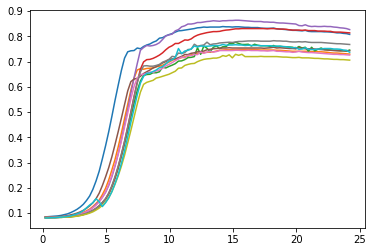

In [29]:
columnas = [x+str(y) for x in ['C', 'D'] for y in range(3,8)]
for i in columnas:
    #print(i)
    plt.plot(df_OD['Time'], df_OD[i])
plt.show()

In [ ]:
# El gráfico anterior corresponde al siguiente filtro
measurement_name = 'OD'
strain = 'Top10'
media = 'M9-glucosa'
dna= 'pLux76:RFP/pTet:YFP/std:CFP'